# Bharath Gunasekearan
## NLP task with AutoViml
Dataset used Stackoverflow question quality dataset.
The dataset is used to predict the quality of a  stack overflow question. 
There are 3 plossible classification:

1) HQ

2) LQ

3) LQ_CLOSE

In [ ]:
! pip install deep_autoviml


In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
!wget https://raw.githubusercontent.com/bharathGuna/CMPE-297-Special-Topics/main/assignment4/datasets/train.csv -P ./data/


--2021-10-29 05:44:54--  https://raw.githubusercontent.com/bharathGuna/CMPE-297-Special-Topics/main/assignment4/datasets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49938019 (48M) [text/plain]
Saving to: ‘./data/train.csv.1’

train.csv.1         100%[===================>]  47.62M   159MB/s    in 0.3s    

2021-10-29 05:44:58 (159 MB/s) - ‘./data/train.csv.1’ saved [49938019/49938019]



In [ ]:
trainpath = "/content/data/train.csv"
df_train = pd.read_csv(trainpath, encoding='ISO-8859-1')
df_train.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [ ]:
df_train = df_train[['Body','Y']]
df_train.head()
print(df_train.shape)

(45000, 2)


In [ ]:
target = 'Y'
df_train[target].value_counts()

HQ          15000
LQ_EDIT     15000
LQ_CLOSE    15000
Name: Y, dtype: int64

In [ ]:
df_train = df_train.sample(15000, random_state=1)
df_train[target].value_counts()

LQ_EDIT     5052
HQ          5036
LQ_CLOSE    4912
Name: Y, dtype: int64

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df_train.drop(columns=[target]), df_train[target], 
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    random_state=122)

train_X[target] = train_y
train_X.to_csv('/content/data/stackoverflow_train.csv')
test_X[target] = test_y
test_X.to_csv('/content/data/stackoverflow_test.csv')

Deep AutoVIML

In [ ]:
trainpath = '/content/data/stackoverflow_train.csv'
testpath = '/content/data/stackoverflow_test.csv'
keras_model_type =  "auto" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 20, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 20
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows > maxrows, loading a random sample of 76327 rows into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Multi_Classification and Single_Label problem
Loade

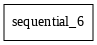

Model plot saved in file: deep_autoviml_stackoverflow_quality_classification_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.0, 2: 1.008827238335435}
    original datasize = 305310, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 95420
    number of classes = 3, output_activation = softmax
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 15, number epochs = 20
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen kera

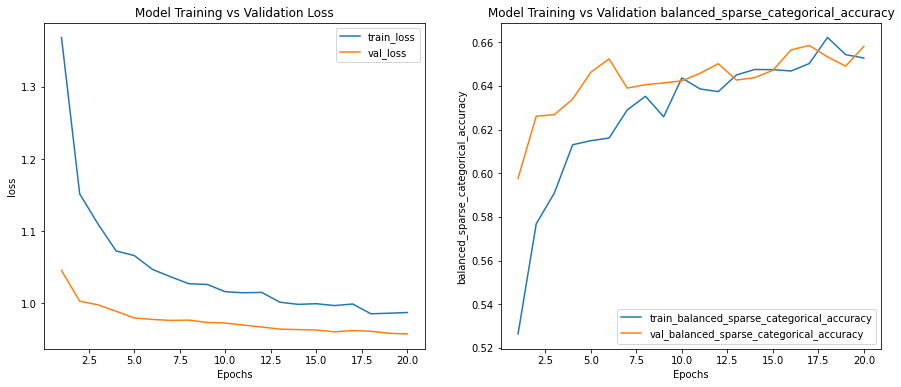

Time taken to train model (in mins) = 3
    Stopped epoch = 10
Held out data actuals shape: (1216,)
    samples from label: [2, 0, 1, 2, 0, 1, 0, 2, 2, 1]

Held out predictions shape:(1216,)
    Sample predictions: [2 0 0 2 2 1 0 2 2 1]

###########################################################
         Held-out test data set Results:
Single Label (single-output), Multi-Class Report: Y
#################################################################


    Accuracy          = 66.5%
    Balanced Accuracy (average recall) = 66.3%
    Average Precision (macro) = 66.2%
    Precisions by class:
    56.7%      66.5%      75.5%  
    Recall Scores by class:
    52.7%      71.8%      74.6%  
    F1 Scores by class:
    54.6%      69.0%      75.0%  
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00075395405
    set learning rate using best model: 0.00075395405
    max epochs for training = 10

Model not being saved since save_model_flag set to False...
5964

Saving vocab dictionary using pickle in stackoverflow_quality_classification/auto/model_2021_10_29-05_51_05/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in stackoverflow_quality_classification/auto/model_2021_10_29-05_51_05/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in stackoverflow_quality_classification/auto/model_2021_10_29-

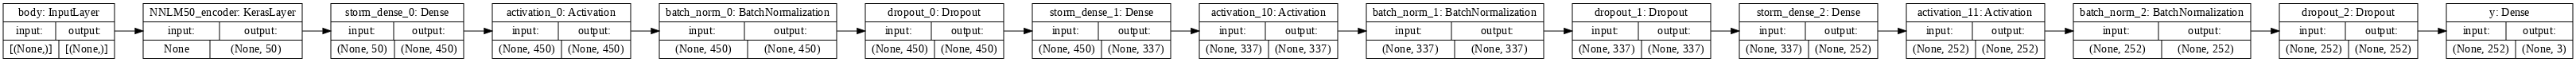

Model plot saved in file: deep_autoviml_stackoverflow_quality_classification_auto_model_after.png


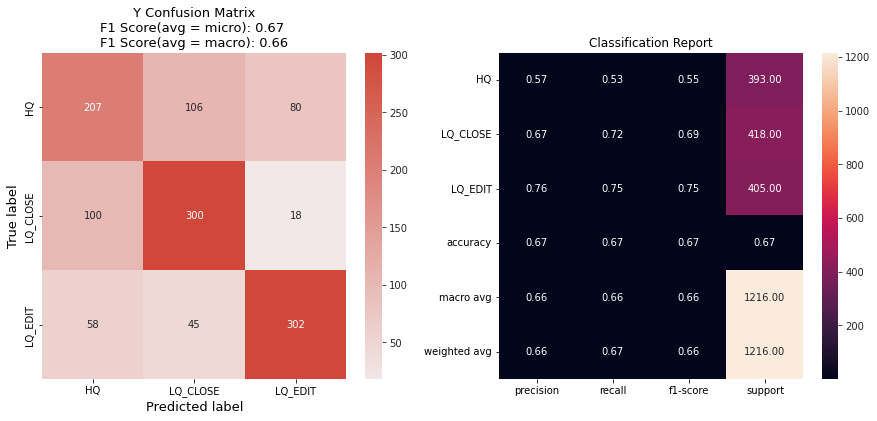

In [ ]:
model, dicti = deepauto.fit(trainpath, target, keras_model_type=keras_model_type, 
                            project_name='stackoverflow_quality_classification',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

# Inference

In [ ]:
testpath = '/content/data/stackoverflow_test.csv'
predictions = deepauto.predict(model, project_name='stackoverflow_quality_classification', test_dataset=testpath,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f003fc289d0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f003fc289d0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 3000
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    3 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 1, high cats = 0, very high cats = 1
Distribution of integer columns in datatset:
    number of binary = 0, cat

In [ ]:
test = pd.read_csv(testpath)
print(classification_report(test[target].values,predictions[1]))


              precision    recall  f1-score   support

          HQ       0.22      0.21      0.22      1008
    LQ_CLOSE       0.24      0.28      0.26       943
     LQ_EDIT       0.73      0.66      0.70      1049

    accuracy                           0.39      3000
   macro avg       0.40      0.38      0.39      3000
weighted avg       0.41      0.39      0.40      3000

